# Internet Firewall Dataset
## Source: UCI Machine Learning Repository.
## Link: Internet Firewall Dataset
## Description: This dataset contains log data from an internet firewall. Each row represents a network connection, and the goal is to predict whether the connection will be allowed or blocked by the firewall.
## Target Column: Action


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [5]:
url = "log2.csv"
df = pd.read_csv(url)

In [6]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [9]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64


In [12]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


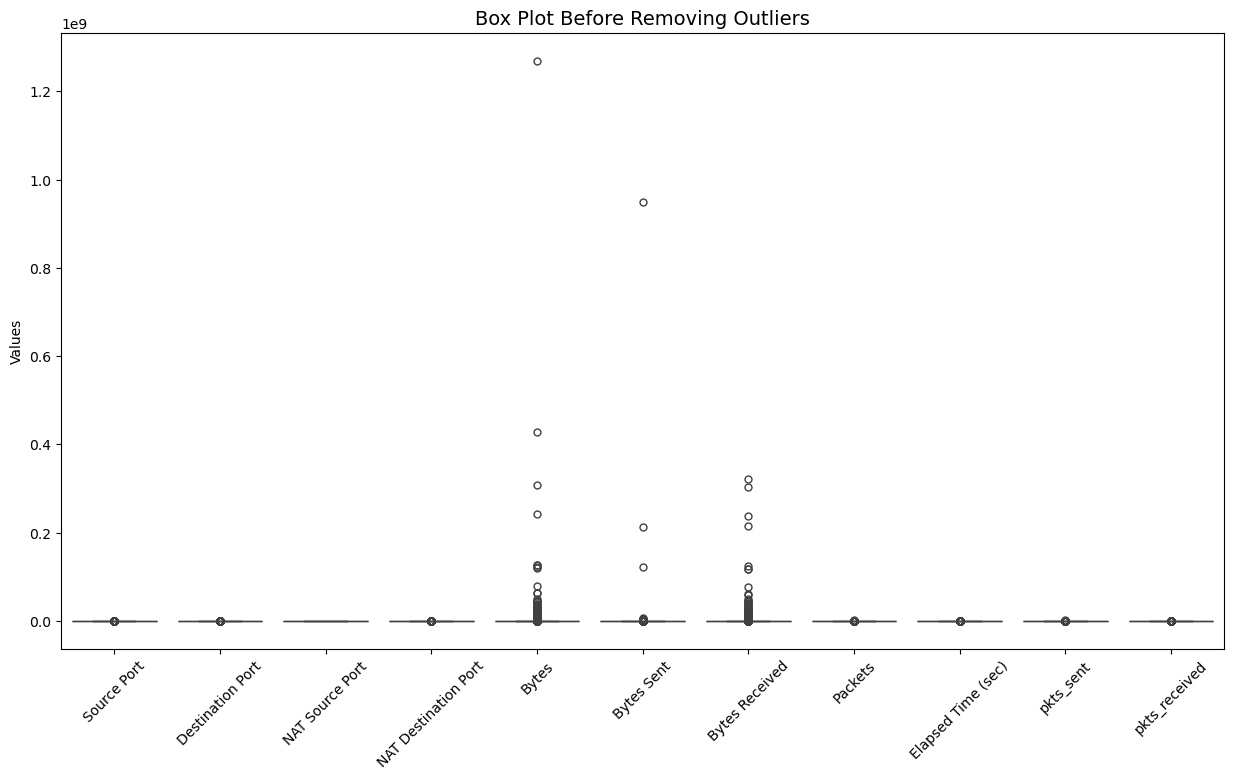

In [14]:
# Box plot Before removing Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=["Action"]),flierprops={'marker':'o','color':'red','markersize':5})
plt.title("Box Plot Before Removing Outliers", fontsize=14)
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [15]:
df.dropna(inplace=True)

In [16]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 8362


In [20]:
df.drop_duplicates(inplace=True)

In [22]:
label_encoder = LabelEncoder()
df['Action'] = label_encoder.fit_transform(df['Action'])

In [24]:
print("\nUnique values in the target variable (Action):", df['Action'].unique())


Unique values in the target variable (Action): [0 2 1 3]


# VISUALIZATIONS USING MATPLOTLIB AND SEABORN

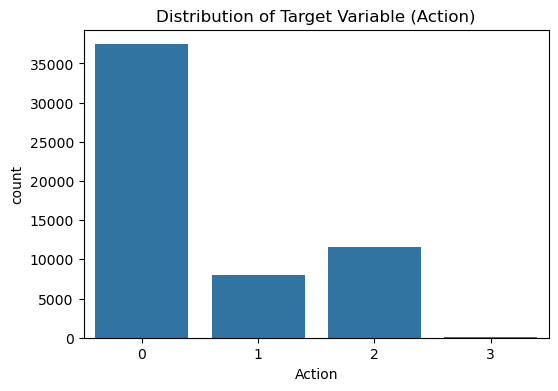

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Action', data=df)
plt.title("Distribution of Target Variable (Action)")
plt.show()

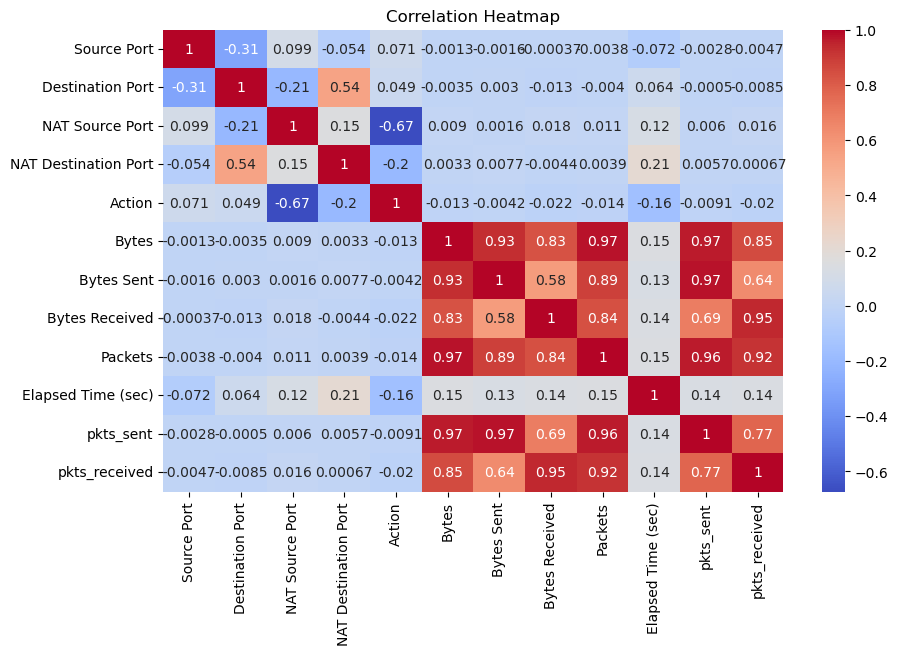

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

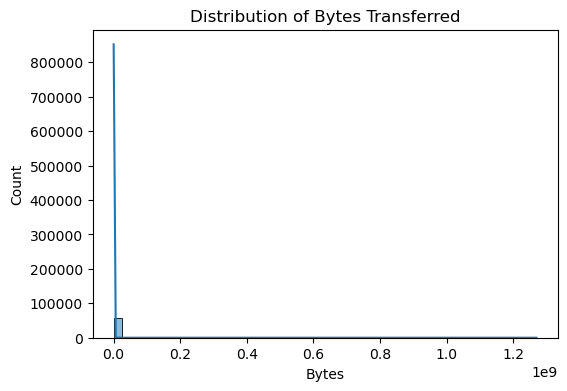

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Bytes'], bins=50, kde=True)
plt.title("Distribution of Bytes Transferred")
plt.show()

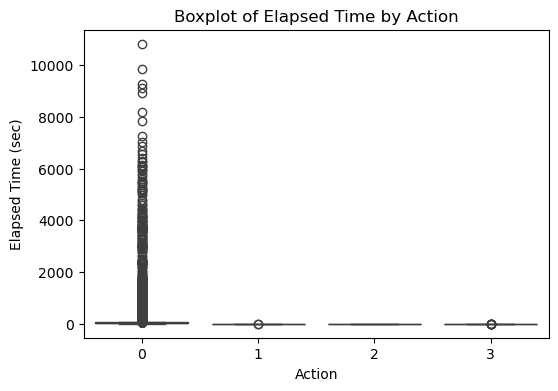

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Action', y='Elapsed Time (sec)', data=df)
plt.title("Boxplot of Elapsed Time by Action")
plt.show()

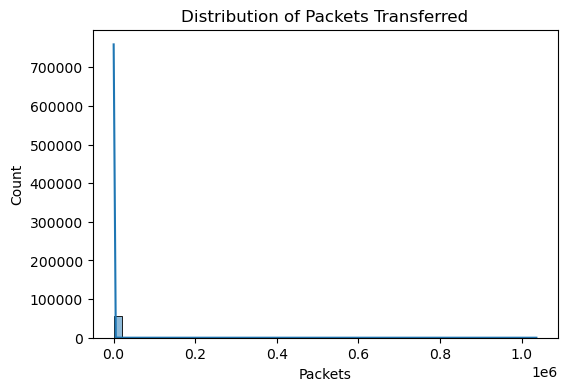

In [34]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Packets'], bins=50, kde=True)
plt.title("Distribution of Packets Transferred")
plt.show()

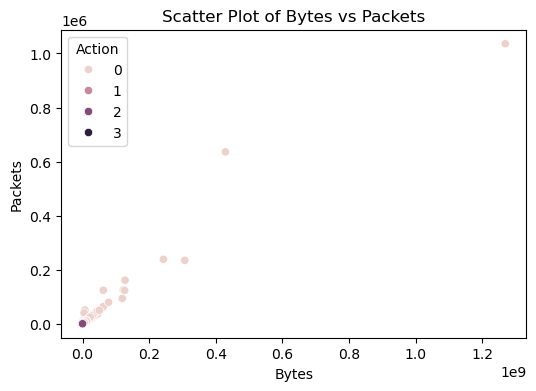

In [36]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Bytes', y='Packets', hue='Action', data=df)
plt.title("Scatter Plot of Bytes vs Packets")
plt.show()


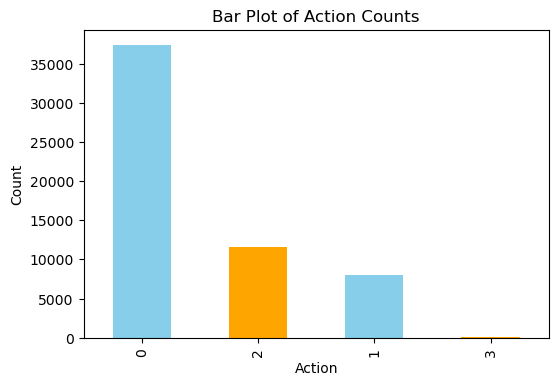

In [37]:
plt.figure(figsize=(6, 4))
df['Action'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Bar Plot of Action Counts")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()


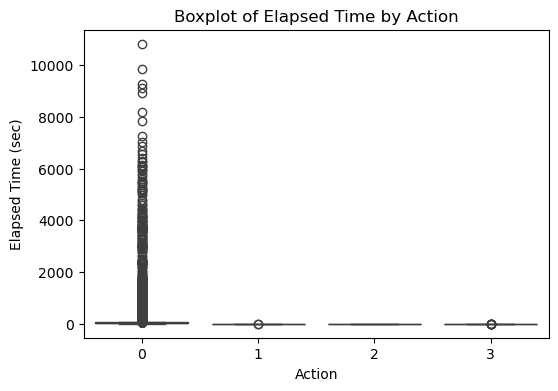

In [39]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Action', y='Elapsed Time (sec)', data=df)
plt.title("Boxplot of Elapsed Time by Action")
plt.show()

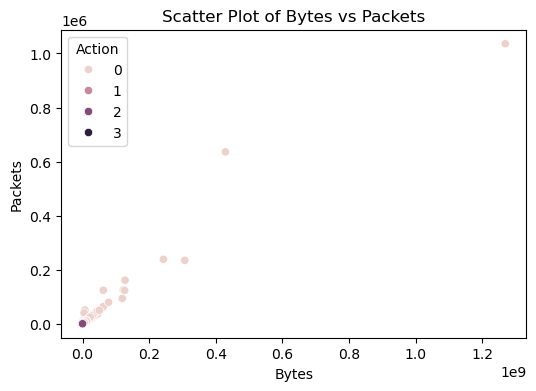

In [40]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Bytes', y='Packets', hue='Action', data=df)
plt.title("Scatter Plot of Bytes vs Packets")
plt.show()

## HANDLING OUTLIERS

In [42]:
numerical_columns = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 
                     'Bytes', 'Packets', 'Elapsed Time (sec)']


In [44]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [47]:
df_cleaned = remove_outliers_iqr(df, numerical_columns)


print("\nShape of the dataset before removing outliers:", df.shape)
print("Shape of the dataset after removing outliers:", df_cleaned.shape)


Shape of the dataset before removing outliers: (57170, 12)
Shape of the dataset after removing outliers: (28136, 12)


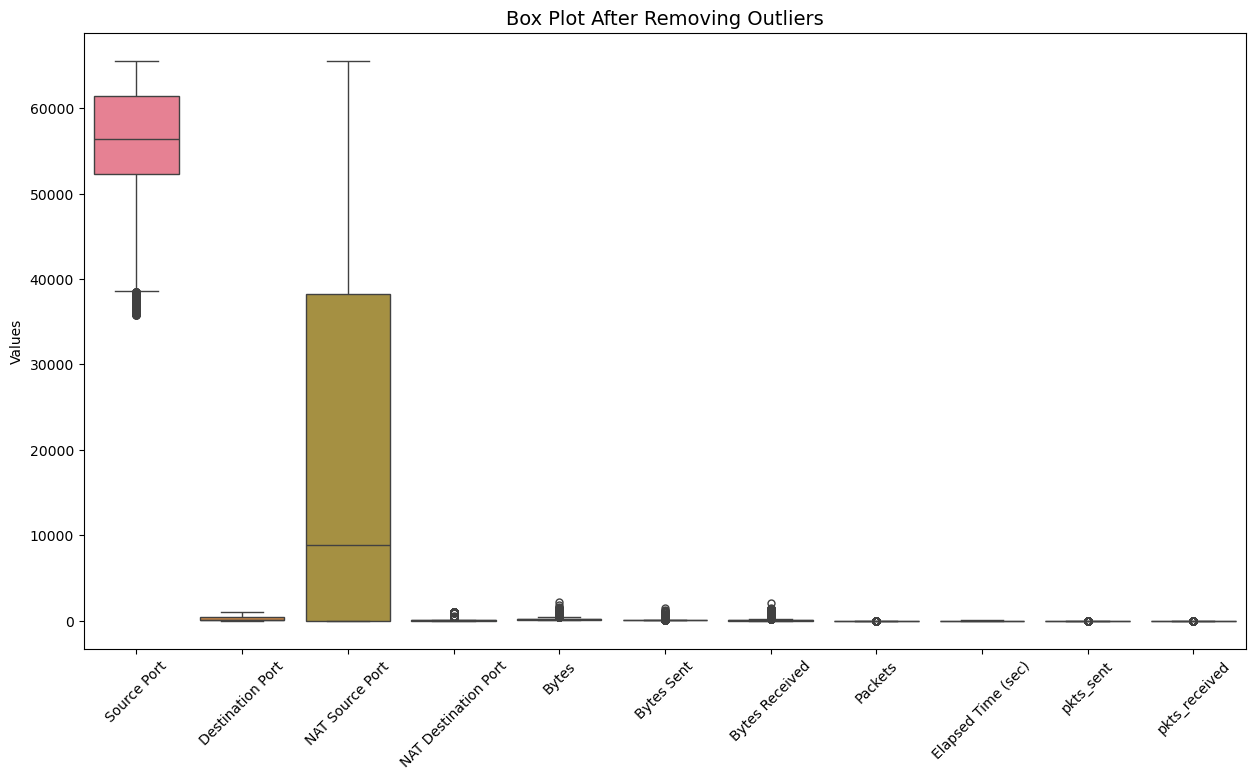

In [48]:
# Box plot After removing Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned.drop(columns=["Action"]),flierprops={'marker':'o','color':'red','markersize':5})
plt.title("Box Plot After Removing Outliers", fontsize=14)
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

# STANDARD SCALAR

In [50]:
X = df.drop('Action', axis=1)
y = df['Action']

In [51]:
# Apply StandardScaler
X=X.select_dtypes(include=['number'])
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)
df_standard = pd.DataFrame(X_standard_scaled, columns=X.columns)


### VISUALIZATION OF SCALED DATA 

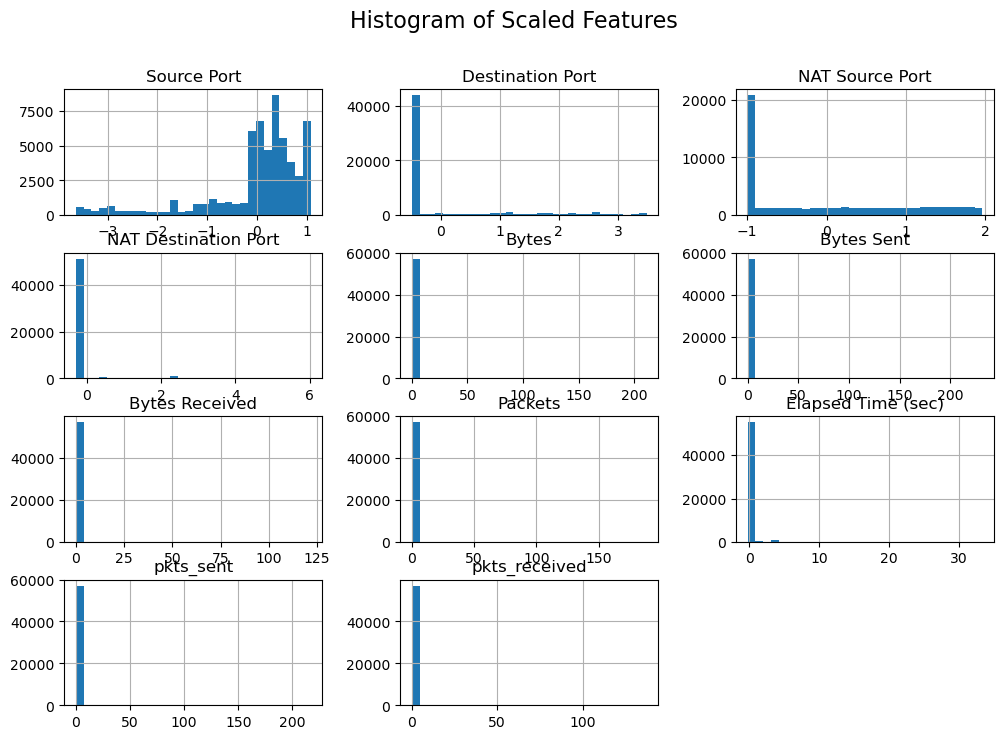

In [57]:
df_standard.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Scaled Features", fontsize=16)
plt.show()

#  TRAIN TEST SPLIT

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Models

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.993877907993703
KNN Precision: 0.9932055558625855
KNN Recall: 0.993877907993703
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7430
           1       0.97      0.98      0.98      1615
           2       1.00      1.00      1.00      2381
           3       0.00      0.00      0.00         8

    accuracy                           0.99     11434
   macro avg       0.74      0.74      0.74     11434
weighted avg       0.99      0.99      0.99     11434



In [69]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')


In [70]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')


In [71]:
print("KNN Results:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.993877907993703
Precision: 0.9932055558625855
Recall: 0.993877907993703
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7430
           1       0.97      0.98      0.98      1615
           2       1.00      1.00      1.00      2381
           3       0.00      0.00      0.00         8

    accuracy                           0.99     11434
   macro avg       0.74      0.74      0.74     11434
weighted avg       0.99      0.99      0.99     11434



In [72]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))



Logistic Regression Results:
Accuracy: 0.9917789050201155
Precision: 0.9912580873265192
Recall: 0.9917789050201155
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7430
           1       0.99      0.95      0.97      1615
           2       0.97      1.00      0.98      2381
           3       0.00      0.00      0.00         8

    accuracy                           0.99     11434
   macro avg       0.74      0.74      0.74     11434
weighted avg       0.99      0.99      0.99     11434



In [73]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9977260801119469
Precision: 0.9974692526562964
Recall: 0.9977260801119469
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7430
           1       0.99      0.99      0.99      1615
           2       1.00      1.00      1.00      2381
           3       0.50      0.12      0.20         8

    accuracy                           1.00     11434
   macro avg       0.87      0.78      0.80     11434
weighted avg       1.00      1.00      1.00     11434



In [74]:
models = ['KNN', 'Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_knn, accuracy_log_reg, accuracy_rf]
precision_scores = [precision_knn, precision_log_reg, precision_rf]
recall_scores = [recall_knn, recall_log_reg, recall_rf]

## Bar plot

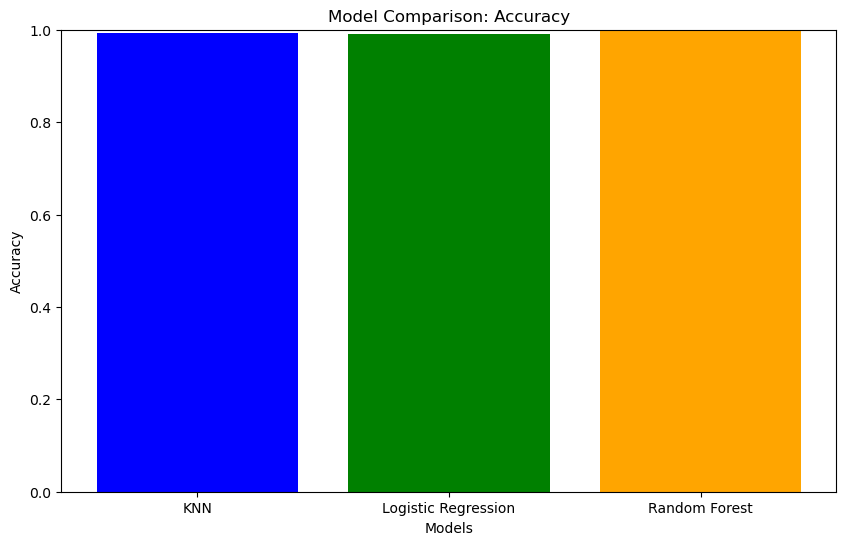

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 1.0)
plt.show()


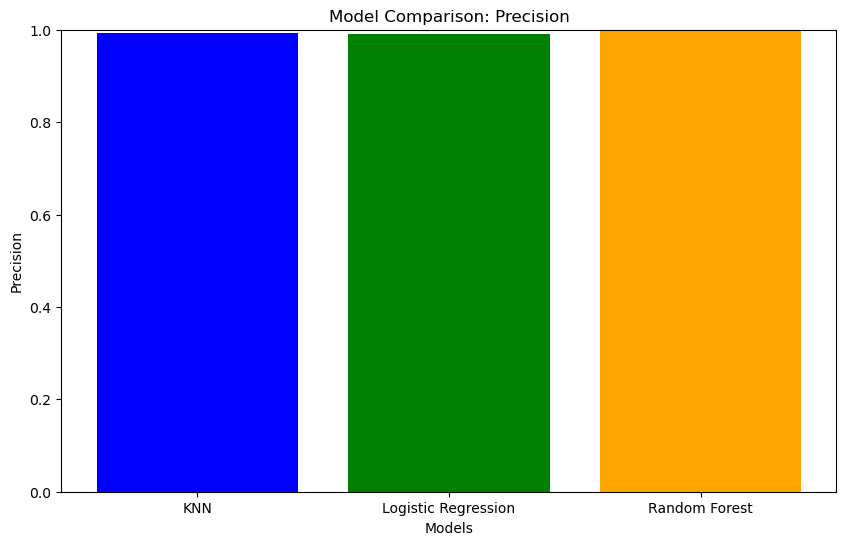

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Comparison: Precision')
plt.ylim(0, 1.0)
plt.show()


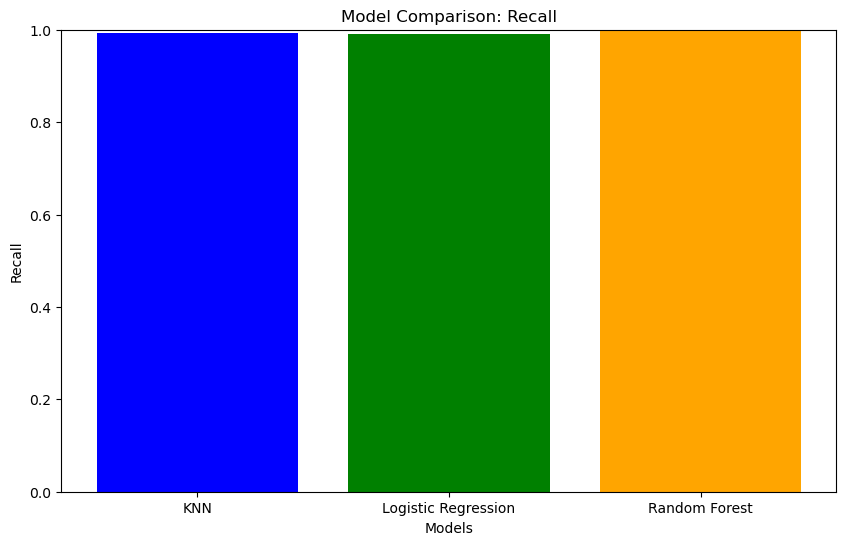

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(models, recall_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Comparison: Recall')
plt.ylim(0, 1.0)
plt.show()

## Best model

In [78]:
average_scores = {
    'KNN': (accuracy_knn + precision_knn + recall_knn) / 3,
    'Logistic Regression': (accuracy_log_reg + precision_log_reg + recall_log_reg) / 3,
    'Random Forest': (accuracy_rf + precision_rf + recall_rf) / 3
}

best_model = max(average_scores, key=average_scores.get)
best_score = average_scores[best_model]

print("\nAverage Scores for Each Model:")
for model, score in average_scores.items():
    print(f"{model}: {score:.4f}")

print(f"\nThe best model is {best_model} with an average score of {best_score:.4f}")


Average Scores for Each Model:
KNN: 0.9937
Logistic Regression: 0.9916
Random Forest: 0.9976

The best model is Random Forest with an average score of 0.9976
